In [1]:
import json
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from pandas.plotting import register_matplotlib_converters
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
foo = pd.read_csv('files/df_sans_zero_sentiments.csv')

In [4]:
foo = foo.drop(['Unnamed: 0'],axis=1)

In [6]:
bar = foo[(foo.commentCount > 1000) & (foo.viewCount < 8000000)]

In [8]:
train, test = train_test_split(bar, test_size=0.2)

In [9]:
train.columns

Index(['date', 'title', 'class', 'viewCount', 'commentCount', 'likeCount',
       'dislikeCount', 'ratio', 'magMean', 'magStd', 'magMin', 'magLq',
       'magMedian', 'magUq', 'magMax', 'sentMean', 'sentStd', 'sentMin',
       'sentLq', 'sentMedian', 'sentUq', 'sentMax'],
      dtype='object')

In [10]:
drop = ['date','title','ratio']

In [11]:
reg =  linear_model.LinearRegression()
X_train = train.drop(drop,axis=1)
X_test = test.drop(drop,axis=1)
y_train = train.ratio
y_test = test.ratio
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-6.67154503e-01 -2.36031484e-06 -2.65022031e-04  3.39866833e-04
 -9.14622478e-05  7.31983873e-01 -4.05974998e-01  3.17273489e+00
 -1.93623710e-01 -3.38062174e-01 -1.23515689e-01 -2.97433022e-03
  2.06363472e+02  2.67123335e+01 -4.27015602e+00 -1.00208110e+01
 -3.05336533e+01 -6.21612034e+01 -2.98773445e+00] + 2.6550727002752748


In [12]:
prediction = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediction)))
print("R^2:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))

MSE: 38.27312649729574
RMSE: 6.186527822397289
R^2: 0.4447269120491463
MAE: 4.493316630098422


In [13]:
knn = KNeighborsClassifier(n_neighbors=31)
X_train = train.drop(['class','date','title'],axis=1)
X_test = test.drop(['class','date','title'],axis=1)
y_train = train['class']
y_test = test['class']
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.31875

In [15]:
confusion_matrix(y_test, y_pred)

array([[ 0,  2,  5,  0,  0,  0],
       [ 0, 12, 31,  0,  0,  0],
       [ 0, 13, 39,  2,  0,  0],
       [ 0,  8, 19,  0,  0,  0],
       [ 0,  5, 12,  0,  0,  0],
       [ 0,  2, 10,  0,  0,  0]], dtype=int64)

In [499]:
zero = bar[bar['class'] == 0]
one = bar[bar['class'] == 1]
two = bar[bar['class'] == 2]
three = bar[bar['class'] == 3]
four = bar[bar['class'] == 4]
five = bar[bar['class'] == 5]

In [562]:
arr = [zero,one,two,three,four,five]

for i in range(1,5):
    arr[i] = resample(arr[i], replace=False, n_samples=len(five))
    
foobar = pd.concat([arr[0],arr[1],arr[2],arr[3],arr[4],arr[5]])

foobar['class'].value_counts()

5    70
4    70
3    70
2    70
1    70
0    61
Name: class, dtype: int64

In [625]:
X = foobar.drop(['class','date','title'],axis=1)
y = foobar['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [619]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [623]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=11),GaussianNB(),MLPClassifier(),SVC()]

In [624]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test,y_pred))
    print(f1_score(y_test,y_pred,average='macro'))
    print(precision_score(y_test,y_pred,average='macro'))
    print(recall_score(y_test,y_pred,average='macro'))
    print(confusion_matrix(y_test,y_pred))

0.3132530120481928
0.304313369630974
0.30527563252021456
0.3295669729880256
[[2 2 3 3 4 4]
 [2 8 4 3 2 0]
 [1 5 4 2 2 1]
 [2 0 0 3 1 1]
 [0 3 1 1 5 2]
 [0 1 3 1 3 4]]
0.21686746987951808
0.21558523869696178
0.25393270944741536
0.21211361737677525
[[3 7 2 4 2 0]
 [0 5 4 3 2 5]
 [0 6 3 3 3 0]
 [2 0 2 1 1 1]
 [0 3 3 2 3 1]
 [1 1 2 4 1 3]]
0.21686746987951808
0.18834044377522638
0.29763803448013976
0.256390977443609
[[ 0  1  1  3 12  1]
 [ 1  1  2  1 13  1]
 [ 0  0  3  2 10  0]
 [ 0  0  1  2  4  0]
 [ 0  0  0  2 10  0]
 [ 1  0  0  1  8  2]]
0.14457831325301204
0.042105263157894736
0.024096385542168672
0.16666666666666666
[[ 0  0  0  0  0 18]
 [ 0  0  0  0  0 19]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0  0  7]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  0 12]]
0.0963855421686747
0.04288389513108615
0.18089430894308944
0.17543859649122806
[[ 0  0  0 18  0  0]
 [ 0  1  0 18  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0 12  0  0]]


C:\Users\me\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\me\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\me\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\me\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

In [517]:
ok = pd.concat([one,two])

In [644]:
df = foobar.drop(['title','date','class'],axis=1)


In [610]:
df = foobar[['sentMean','ratio']]

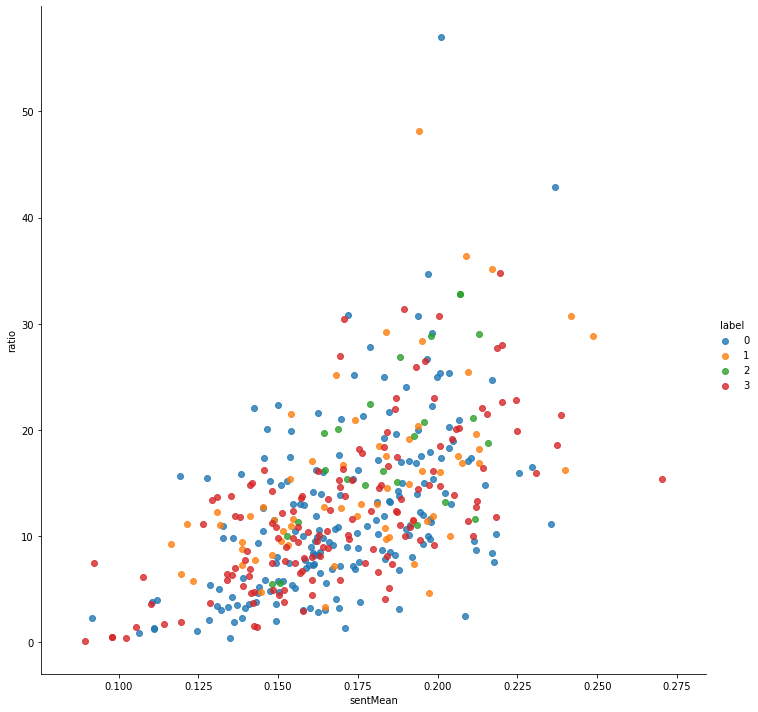

In [647]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['label'] = kmeans.predict(df)
_p = sns.lmplot("sentMean", "ratio", data=df, fit_reg=False, hue='label', height=10)